In [ ]:
# Mounting our drive to Google Colab
from google.colab import drive
drive.mount('/drive')

Drive already mounted at /drive; to attempt to forcibly remount, call drive.mount("/drive", force_remount=True).


In [5]:
# OS module in Python is a part of the standard library of the programming language
import os
# module import name for opencv-python (Open Source Computer Vision Library)
import cv2
import keras
# The import random loads the random module, which contains a number of random number generation- related functions
import random
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
# from matplotlib import pyplot as plt
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

%matplotlib inline

In [6]:
DIRECTORY = '/drive/MyDrive/Colab Notebooks/160423 CNN/nature/nature/seg_train/seg_train/'
CATEGORIES = ['buildings', 'forest', 'glacier', 'mountain', 'sea', 'street']

os. path. join combines path names into one complete path. 

This means that you can merge multiple parts of a path into one, instead of hard-coding every path name manually.




Python method listdir() returns a list containing the names of the entries in the directory given by path. The list is in arbitrary order.







In [7]:
data = []
for category in CATEGORIES:
  path = os.path.join(DIRECTORY, category)
  for img in os.listdir(path):
    img_path = os.path.join(path, img)
    label = CATEGORIES.index(category)
    # It specifies to load an image in grayscale mode. Can read a color image file in grayscale (black and white)
    arr = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    new_arr = cv2.resize(arr, (120,120)) # resize from 150 x 150 to 120 x 120 if size too big
    data.append([new_arr, label])

In [8]:
len(data)

2700

In [9]:
random.shuffle(data)
X = []
y = []

for features, label in data:
  X.append(features)
  y.append(label)

X = np.array(X)
y = np.array(y)
X = X/255
X = X.reshape(-1, 120, 120, 1) # -1 and 1 to reshape image (number of columns and rows)
# to maintain pixel at 120 x 120
X.shape

(2700, 120, 120, 1)

## **Architecture**

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size = 0.3, random_state =0)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1890, 120, 120, 1) (810, 120, 120, 1) (1890,) (810,)


In [11]:
from keras.utils import to_categorical

# convert from integers to floats
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding
Y_train = to_categorical(y_train)
Y_test = to_categorical(y_test)

In [12]:
from keras.layers import Dropout

L1 = 16
L2 = 32
L3 = 64
model = Sequential()
model.add(Conv2D(L1,(3,3), activation='relu', input_shape=(120, 120, 1), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(L1,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(L3, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history =  model.fit(X_train, Y_train, epochs = 10, batch_size = 100, validation_data = (X_test, Y_test))

Epoch 1/10
19/19 [==============================] - 22s 1s/step - loss: 1.7815 - accuracy: 0.1735 - val_loss: 1.7650 - val_accuracy: 0.1667
Epoch 2/10
19/19 [==============================] - 15s 812ms/step - loss: 1.7748 - accuracy: 0.1958 - val_loss: 1.7553 - val_accuracy: 0.1938
Epoch 3/10
19/19 [==============================] - 16s 855ms/step - loss: 1.7741 - accuracy: 0.1788 - val_loss: 1.7555 - val_accuracy: 0.1667
Epoch 4/10
19/19 [==============================] - 15s 810ms/step - loss: 1.7700 - accuracy: 0.1862 - val_loss: 1.7584 - val_accuracy: 0.1667
Epoch 5/10
19/19 [==============================] - 15s 809ms/step - loss: 1.7746 - accuracy: 0.1820 - val_loss: 1.7578 - val_accuracy: 0.1667
Epoch 6/10
19/19 [==============================] - 16s 858ms/step - loss: 1.7686 - accuracy: 0.1952 - val_loss: 1.7546 - val_accuracy: 0.1667
Epoch 7/10
19/19 [==============================] - 15s 804ms/step - loss: 1.7663 - accuracy: 0.1868 - val_loss: 1.7483 - val_accuracy: 0.1667
Ep

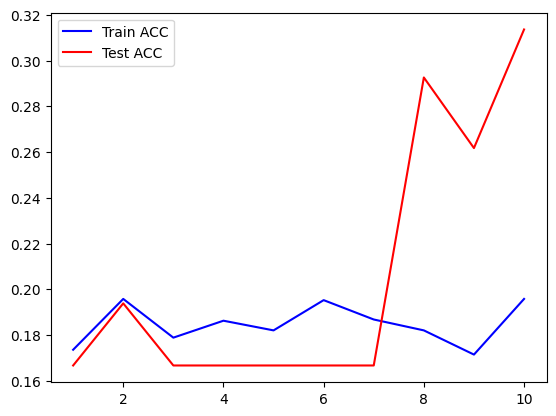

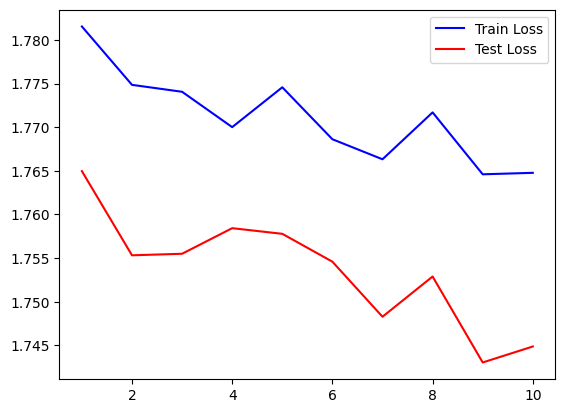

In [13]:
import matplotlib.pyplot as plt

acc2 =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train ACC')
plt.plot(epochs, val_acc,'r',label='Test ACC')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

Increase batch size from 100 to 1000

In [14]:
from keras.layers import Dropout
from keras.models import Sequential

L1 = 16
L2 = 32
L3 = 64
model = Sequential()
model.add(Conv2D(L1,(3,3), activation='relu', input_shape=(120, 120, 1), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(L1,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Flatten())
model.add(Dense(L3, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(6, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history =  model.fit(X_train, Y_train, epochs = 20, batch_size = 1000, validation_data = (X_test, Y_test))

Epoch 1/20
2/2 [==============================] - 17s 9s/step - loss: 1.7906 - accuracy: 0.1767 - val_loss: 1.7729 - val_accuracy: 0.1988
Epoch 2/20
2/2 [==============================] - 16s 8s/step - loss: 1.7750 - accuracy: 0.1788 - val_loss: 1.7485 - val_accuracy: 0.1667
Epoch 3/20
2/2 [==============================] - 17s 9s/step - loss: 1.7758 - accuracy: 0.1757 - val_loss: 1.7483 - val_accuracy: 0.1667
Epoch 4/20
2/2 [==============================] - 16s 9s/step - loss: 1.7677 - accuracy: 0.1720 - val_loss: 1.7572 - val_accuracy: 0.1901
Epoch 5/20
2/2 [==============================] - 20s 13s/step - loss: 1.7718 - accuracy: 0.1778 - val_loss: 1.7600 - val_accuracy: 0.1901
Epoch 6/20
2/2 [==============================] - 17s 8s/step - loss: 1.7701 - accuracy: 0.1899 - val_loss: 1.7574 - val_accuracy: 0.1901
Epoch 7/20
2/2 [==============================] - 22s 10s/step - loss: 1.7735 - accuracy: 0.1873 - val_loss: 1.7529 - val_accuracy: 0.1901
Epoch 8/20
2/2 [================

Reduce dropout from 0.5 to 0.2, and add dropouts at each layer

In [15]:
from keras.layers import Dropout
from keras.models import Sequential

L1 = 16
L2 = 32
L3 = 64
model = Sequential()
model.add(Conv2D(L1,(3,3), activation='relu', input_shape=(120, 120, 1), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(L1,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(L3, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history =  model.fit(X_train, Y_train, epochs = 20, batch_size = 1000, validation_data = (X_test, Y_test))

Epoch 1/20
2/2 [==============================] - 21s 10s/step - loss: 1.7909 - accuracy: 0.1757 - val_loss: 1.7814 - val_accuracy: 0.1988
Epoch 2/20
2/2 [==============================] - 19s 10s/step - loss: 1.7767 - accuracy: 0.1942 - val_loss: 1.7523 - val_accuracy: 0.1988
Epoch 3/20
2/2 [==============================] - 17s 8s/step - loss: 1.7691 - accuracy: 0.1899 - val_loss: 1.7409 - val_accuracy: 0.2840
Epoch 4/20
2/2 [==============================] - 18s 10s/step - loss: 1.7677 - accuracy: 0.1942 - val_loss: 1.7487 - val_accuracy: 0.1938
Epoch 5/20
2/2 [==============================] - 17s 10s/step - loss: 1.7643 - accuracy: 0.1926 - val_loss: 1.7561 - val_accuracy: 0.2840
Epoch 6/20
2/2 [==============================] - 17s 8s/step - loss: 1.7634 - accuracy: 0.2032 - val_loss: 1.7565 - val_accuracy: 0.2395
Epoch 7/20
2/2 [==============================] - 21s 12s/step - loss: 1.7610 - accuracy: 0.2302 - val_loss: 1.7512 - val_accuracy: 0.2309
Epoch 8/20
2/2 [=============

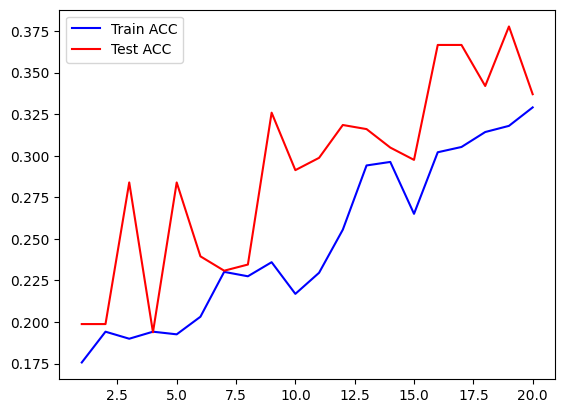

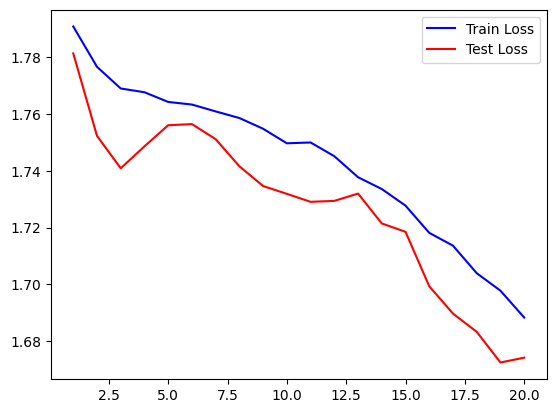

In [16]:
import matplotlib.pyplot as plt

acc2 =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train ACC')
plt.plot(epochs, val_acc,'r',label='Test ACC')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [17]:
from keras.layers import Dropout
from keras.models import Sequential

L1 = 16
L2 = 32
L3 = 64
model = Sequential()
model.add(Conv2D(L1,(3,3), activation='relu', input_shape=(120, 120, 1), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(L1,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(L3, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history =  model.fit(X_train, Y_train, epochs = 50, batch_size = 1000, validation_data = (X_test, Y_test))

Epoch 1/50
2/2 [==============================] - 21s 11s/step - loss: 1.7910 - accuracy: 0.1836 - val_loss: 1.7822 - val_accuracy: 0.1938
Epoch 2/50
2/2 [==============================] - 19s 10s/step - loss: 1.7785 - accuracy: 0.1894 - val_loss: 1.7531 - val_accuracy: 0.1938
Epoch 3/50
2/2 [==============================] - 17s 10s/step - loss: 1.7710 - accuracy: 0.1894 - val_loss: 1.7473 - val_accuracy: 0.1938
Epoch 4/50
2/2 [==============================] - 17s 8s/step - loss: 1.7670 - accuracy: 0.1958 - val_loss: 1.7527 - val_accuracy: 0.2062
Epoch 5/50
2/2 [==============================] - 18s 10s/step - loss: 1.7641 - accuracy: 0.1947 - val_loss: 1.7548 - val_accuracy: 0.1667
Epoch 6/50
2/2 [==============================] - 17s 10s/step - loss: 1.7625 - accuracy: 0.1995 - val_loss: 1.7487 - val_accuracy: 0.2827
Epoch 7/50
2/2 [==============================] - 18s 9s/step - loss: 1.7630 - accuracy: 0.2095 - val_loss: 1.7428 - val_accuracy: 0.3025
Epoch 8/50
2/2 [=============

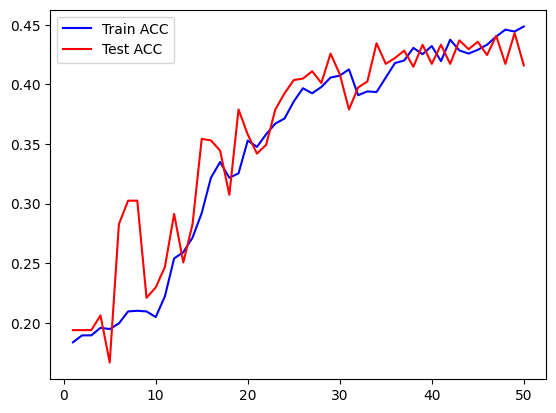

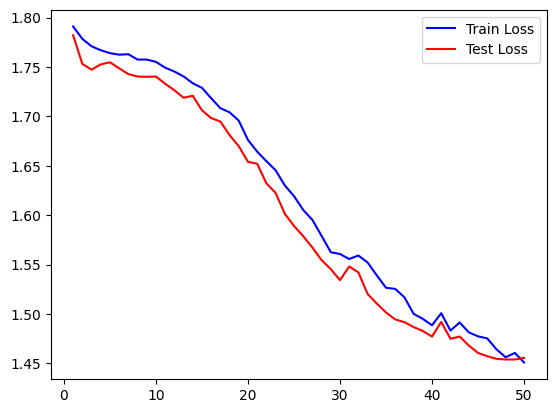

In [18]:
import matplotlib.pyplot as plt

acc2 =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train ACC')
plt.plot(epochs, val_acc,'r',label='Test ACC')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()

In [19]:
from keras.layers import Dropout
from keras.models import Sequential

L1 = 16
L2 = 32
L3 = 64
model = Sequential()
model.add(Conv2D(L1,(3,3), activation='relu', input_shape=(120, 120, 1), padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.2))
model.add(Conv2D(L1,(3,3), activation='relu', padding='same'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(rate=0.2))
model.add(Flatten())
model.add(Dense(L3, activation='relu'))
model.add(Dropout(rate=0.2))
model.add(Dense(6, activation='softmax'))

model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

history =  model.fit(X_train, Y_train, epochs = 100, batch_size = 1000, validation_data = (X_test, Y_test))

Epoch 1/100
2/2 [==============================] - 31s 21s/step - loss: 1.7897 - accuracy: 0.1693 - val_loss: 1.7735 - val_accuracy: 0.1938
Epoch 2/100
2/2 [==============================] - 20s 10s/step - loss: 1.7724 - accuracy: 0.1831 - val_loss: 1.7435 - val_accuracy: 0.1938
Epoch 3/100
2/2 [==============================] - 17s 9s/step - loss: 1.7680 - accuracy: 0.2021 - val_loss: 1.7431 - val_accuracy: 0.2136
Epoch 4/100
2/2 [==============================] - 17s 9s/step - loss: 1.7655 - accuracy: 0.2095 - val_loss: 1.7517 - val_accuracy: 0.1667
Epoch 5/100
2/2 [==============================] - 20s 12s/step - loss: 1.7600 - accuracy: 0.2185 - val_loss: 1.7513 - val_accuracy: 0.1901
Epoch 6/100
2/2 [==============================] - 18s 10s/step - loss: 1.7593 - accuracy: 0.2026 - val_loss: 1.7453 - val_accuracy: 0.1901
Epoch 7/100
2/2 [==============================] - 18s 9s/step - loss: 1.7552 - accuracy: 0.2032 - val_loss: 1.7411 - val_accuracy: 0.2593
Epoch 8/100
2/2 [======

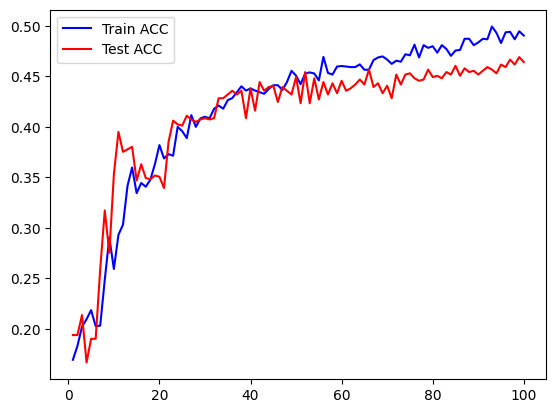

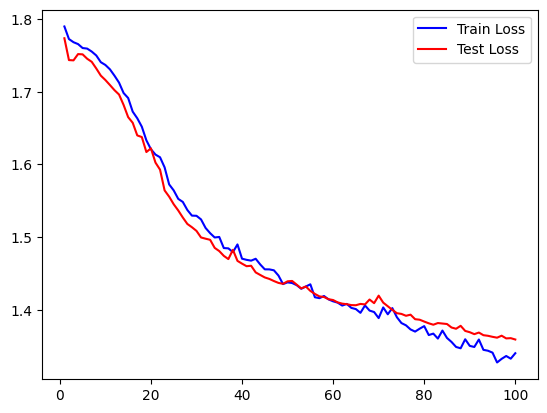

In [20]:
import matplotlib.pyplot as plt

acc2 =history.history['accuracy']
val_acc = history.history['val_accuracy']
loss2 = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc2)+1)


plt.plot(epochs, acc2,'b',label='Train ACC')
plt.plot(epochs, val_acc,'r',label='Test ACC')
plt.legend()
plt.figure()


plt.plot(epochs, loss2,'b',label='Train Loss')
plt.plot(epochs, val_loss,'r',label='Test Loss')
plt.legend()
plt.show()